### Required lib and modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

### Importing Data files

In [2]:
baner = pd.read_excel('data_source/Baner_cleaned.xlsx')
bavdhan = pd.read_excel('data_source/Bavdhan_cleaned.xlsx')
hinjewadi = pd.read_excel('data_source/Hinjawadi_cleaned.xlsx')
wakad = pd.read_excel('data_source/Wakad_cleaned.xlsx')

## Handling Data Files

In [3]:
baner['locality'] = 'Baner'
bavdhan['locality'] = 'Bavdhan'
hinjewadi['locality'] = 'Hinjewadi'
wakad['locality'] = 'Wakad'

In [4]:
baner_copy = baner.copy()
baner_copy =baner_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

bavdhan_copy = bavdhan.copy()
bavdhan_copy =bavdhan_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

hinjewadi_copy = hinjewadi.copy()
hinjewadi_copy =hinjewadi_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

wakad_copy = wakad.copy()
wakad_copy =wakad_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

### Cleaning the delilvery reviews column

In [5]:
baner_copy.delivery_reviews=baner_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
bavdhan_copy.delivery_reviews=bavdhan_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')
hinjewadi_copy.delivery_reviews=hinjewadi_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')
wakad_copy.delivery_reviews=wakad_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')

In [6]:
baner_copy

Name locality  ratings                off  \
0               McDonald's    Baner      4.1            ₹50 OFF   
1               Nawab Asia    Baner      4.1            ₹50 OFF   
2                   Mithas    Baner      4.3            ₹50 OFF   
3                Anna Idli    Baner      4.2            ₹50 OFF   
4     Dadu's Sweet Emporio    Baner      4.3            ₹50 OFF   
...                    ...      ...      ...                ...   
1132                 WYNKK    Baner      NaN            50% OFF   
1133              Ai Shiwu    Baner      3.6            50% OFF   
1134    Mumbaian Pav Bhaji    Baner      3.2            50% OFF   
1135      Shree Datta Bhel    Baner      3.9            50% OFF   
1136               Eggie's    Baner      3.8  Pro extra 25% OFF   

     delivery_reviews                                            cuisine  
0                9810                       Burger, Fast Food, Beverages  
1                3054  North Indian, Chinese, Mughlai, Biryani, Desse...  
2                2262                                Mithai, Street Food  
3               21.8K                            South Indian, Beverages  
4                4504                     Mithai, Street Food, Ice Cream  
...               ...                                                ...  
1132                              Bar Food, North Indian, Mughlai, Asian  
1133             1146                               Chinese, Asian, Thai  
1134               46                                        Street Food  
1135               15                                        Street Food  
1136               87                            North Indian, Fast Food  

[1137 rows x 6 columns]

#### Replacing value of K with 1000

In [7]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    return x
baner_copy['delivery_reviews'] = baner_copy['delivery_reviews'].apply(value_to_float)
bavdhan_copy['delivery_reviews'] = bavdhan_copy['delivery_reviews'].apply(value_to_float)
hinjewadi_copy['delivery_reviews'] = hinjewadi_copy['delivery_reviews'].apply(value_to_float)
wakad_copy['delivery_reviews'] = wakad_copy['delivery_reviews'].apply(value_to_float)

In [8]:
baner_copy

Name locality  ratings                off  \
0               McDonald's    Baner      4.1            ₹50 OFF   
1               Nawab Asia    Baner      4.1            ₹50 OFF   
2                   Mithas    Baner      4.3            ₹50 OFF   
3                Anna Idli    Baner      4.2            ₹50 OFF   
4     Dadu's Sweet Emporio    Baner      4.3            ₹50 OFF   
...                    ...      ...      ...                ...   
1132                 WYNKK    Baner      NaN            50% OFF   
1133              Ai Shiwu    Baner      3.6            50% OFF   
1134    Mumbaian Pav Bhaji    Baner      3.2            50% OFF   
1135      Shree Datta Bhel    Baner      3.9            50% OFF   
1136               Eggie's    Baner      3.8  Pro extra 25% OFF   

     delivery_reviews                                            cuisine  
0                9810                       Burger, Fast Food, Beverages  
1                3054  North Indian, Chinese, Mughlai, Biryani, Desse...  
2                2262                                Mithai, Street Food  
3               21800                            South Indian, Beverages  
4                4504                     Mithai, Street Food, Ice Cream  
...               ...                                                ...  
1132                              Bar Food, North Indian, Mughlai, Asian  
1133             1146                               Chinese, Asian, Thai  
1134               46                                        Street Food  
1135               15                                        Street Food  
1136               87                            North Indian, Fast Food  

[1137 rows x 6 columns]

In [9]:
baner_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1137 non-null   object 
 1   locality          1137 non-null   object 
 2   ratings           851 non-null    float64
 3   off               968 non-null    object 
 4   delivery_reviews  1010 non-null   object 
 5   cuisine           1137 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.4+ KB


## HANDLING BANER DATA SET

In [10]:
baner_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1137 non-null   object 
 1   locality          1137 non-null   object 
 2   ratings           851 non-null    float64
 3   off               968 non-null    object 
 4   delivery_reviews  1010 non-null   object 
 5   cuisine           1137 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.4+ KB


### Dropping NAN values

In [15]:
baner_ratings = baner_copy.dropna(subset=['ratings'])

In [16]:
baner_ratings.isna().sum()

Name                 0
locality             0
ratings              0
off                 58
delivery_reviews     0
cuisine              0
dtype: int64

### Remaining empty values 

In [113]:
baner_ratings[baner_ratings.delivery_reviews != '']

Name locality  ratings                off  \
0               McDonald's    Baner      4.1            ₹50 OFF   
1               Nawab Asia    Baner      4.1            ₹50 OFF   
2                   Mithas    Baner      4.3            ₹50 OFF   
3                Anna Idli    Baner      4.2            ₹50 OFF   
4     Dadu's Sweet Emporio    Baner      4.3            ₹50 OFF   
...                    ...      ...      ...                ...   
1130       Happy Da Punjab    Baner      3.7            50% OFF   
1133              Ai Shiwu    Baner      3.6            50% OFF   
1134    Mumbaian Pav Bhaji    Baner      3.2            50% OFF   
1135      Shree Datta Bhel    Baner      3.9            50% OFF   
1136               Eggie's    Baner      3.8  Pro extra 25% OFF   

      delivery_reviews                                            cuisine  
0               9810.0                       Burger, Fast Food, Beverages  
1               3054.0  North Indian, Chinese, Mughlai, Biryani, Desse...  
2               2262.0                                Mithai, Street Food  
3              21800.0                            South Indian, Beverages  
4               4504.0                     Mithai, Street Food, Ice Cream  
...                ...                                                ...  
1130              69.0              North Indian, Chinese, Kebab, Malwani  
1133            1146.0                               Chinese, Asian, Thai  
1134              46.0                                        Street Food  
1135              15.0                                        Street Food  
1136              87.0                            North Indian, Fast Food  

[851 rows x 6 columns]

### Converting the Values to Integers

In [26]:
def clean(x):
    try:
        return int(x)
    except:
        return np.NaN
baner_ratings['delivery_reviews']  = baner_ratings['delivery_reviews'].apply(clean)

<ipython-input-26-63793db92c2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baner_ratings['delivery_reviews']  = baner_ratings['delivery_reviews'].apply(clean)


In [112]:
baner_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 1136
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              851 non-null    object 
 1   locality          851 non-null    object 
 2   ratings           851 non-null    float64
 3   off               793 non-null    object 
 4   delivery_reviews  823 non-null    float64
 5   cuisine           851 non-null    object 
dtypes: float64(2), object(4)
memory usage: 46.5+ KB


### Making different sets of data

In [28]:
above_four =  baner_ratings.loc[(baner_ratings.ratings > 4.0)]
above_four.reset_index(inplace = True, drop = True)
above_three = baner_ratings.loc[(baner_ratings.ratings >3.0) & (baner_ratings.ratings < 4.0)]
above_three.reset_index(inplace = True, drop = True)
above_two = baner_ratings.loc[(baner_ratings.ratings >2.0) & (baner_ratings.ratings < 3.0)]
above_two.reset_index(inplace = True, drop = True)
above_one = baner_ratings.loc[(baner_ratings.ratings >1.0) & (baner_ratings.ratings < 2.0)]
above_one.reset_index(inplace = True, drop = True)

### Converting delivery values to range of 1-5

In [111]:
above_four.isna().sum()

Name                 0
locality             0
ratings              0
off                 16
delivery_reviews     1
cuisine              0
dtype: int64

new_value = ( (old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

In [83]:
above_four['delivery_reviews'].max()

24300.0

In [84]:
deliv_upto_five = []

In [85]:
deliv_upto_five = []
for i in range(len(above_four)):
    for x in above_four['delivery_reviews']:
        deliv_upto_five = []
        new_value = ( (x - 1.0) / (24300.0 - 1.0) ) * (5.0 - 0.0) + 0.0
        new_value = round(new_value,2)
        deliv_upto_five = deliv_upto_five.append(new_value)

In [108]:

for x in (above_four['delivery_reviews']):
    deliv = []
    new_value = ( (x - 1.0) / (24300.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    deliv.append(new_value)
    print(new_value)

2.02
0.63
0.47
4.49
0.93
0.69
2.02
0.79
0.24
0.18
2.1
0.4
0.23
0.04
0.36
1.71
0.25
0.08
0.33
0.27
0.11
0.26
0.07
2.96
0.63
0.14
0.36
0.07
0.02
0.03
0.28
0.03
0.22
0.04
0.04
0.02
0.12
0.02
0.15
0.05
0.04
0.5
0.02
0.09
0.02
0.11
0.29
0.04
0.02
0.03
0.02
0.13
0.05
0.07
0.06
0.03
nan
0.32
0.23
1.68
0.03
0.15
0.12
0.1
1.0
2.28
1.65
0.42
0.13
2.78
0.8
0.03
0.65
0.05
0.61
0.13
0.02
0.13
0.32
0.03
0.75
0.33
0.25
0.26
0.26
5.0
0.01
0.06
0.08
0.47
0.46
0.63
0.15
0.04
0.04
0.02
0.13
0.06
0.03
0.28
0.46
0.05
0.03
0.02
0.03
0.08
0.06
0.02
0.38
0.09
0.04
0.42
0.09
0.03
0.02
0.99
0.25
0.02
0.12
0.11
0.23
0.54
0.4
0.0
0.04
0.02
0.03
0.17
0.04
0.33
3.13
0.72
1.29
0.2
1.9
0.3
0.5
1.32
0.05
0.09
0.08
0.15
0.24
0.16
3.19
0.03
0.89
0.05
0.06
0.13
0.12
0.02
0.43
0.15
0.1
0.28
0.2
0.1
0.08
0.41
0.04
0.08
0.02
0.04
0.04
0.04
0.14
0.11
0.08
0.12
0.02
0.03
0.01
0.06
0.02
0.12
0.6
0.12
0.15
0.31
0.79
0.03
0.03
0.05
0.09
0.01
0.59
0.59
0.23
0.12
0.28
0.18
0.39
0.18
0.02


In [124]:
deliv = {'deliv':[2.02,0.63,0.47,4.49,0.93,0.69,2.02,0.79,0.24,0.18,2.1,0.4,0.23,0.04,0.36,1.71,0.25,0.08,0.33,0.27,0.11,0.26,0.07,2.96,0.63,0.14,0.36,0.07,0.02,0.03,0.28,0.03,0.22,0.04,0.04,0.02,0.12,0.02,0.15,0.05,0.04,0.5,0.02,0.09,0.02,0.11,0.29,0.04,0.02,0.03,0.02,0.13,0.05,0.07,0.06,0.03,0,0.32,0.23,1.68,0.03,0.15,0.12,0.1,1.0,2.28,1.65,0.42,0.13,2.78,0.8,0.03,0.65,0.05,0.61,0.13,0.02,0.13,0.32,0.03,0.75,0.33,0.25,0.26,0.26,5.0,0.01,0.06,0.08,0.47,0.46,0.63,0.15,0.04,0.04,0.02,0.13,0.06,0.03,0.28,0.46,0.05,0.03,0.02,0.03,0.08,0.06,0.02,0.38,0.09,0.04,0.42,0.09,0.03,0.02,0.99,0.25,0.02,0.12,0.11,0.23,0.54,0.4,0.0,0.04,0.02,0.03,0.17,0.04,0.33,3.13,0.72,1.29,0.2,1.9,0.3,0.5,1.32,0.05,0.09,0.08,0.15,0.24,0.16,3.19,0.03,0.89,0.05,0.06,0.13,0.12,0.02,0.43,0.15,0.1,0.28,0.2,0.1,0.08,0.41,0.04,0.08,0.02,0.04,0.04,0.04,0.14,0.11,0.08,0.12,0.02,0.03,0.01,0.06,0.02,0.12,0.6,0.12,0.15,0.31,0.79,0.03,0.03,0.05,0.09,0.01,0.59,0.59,0.23,0.12,0.28,0.18,0.39,0.18,0.02]}

In [125]:
df = pd.DataFrame(deliv,columns=['deliv'])

In [127]:
above_four['deliv']= df['deliv']

<ipython-input-127-db2f2ce71e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_four['deliv']= df['deliv']


In [128]:
above_four

Name locality  ratings      off  \
0                          McDonald's    Baner      4.1  ₹50 OFF   
1                          Nawab Asia    Baner      4.1  ₹50 OFF   
2                              Mithas    Baner      4.3  ₹50 OFF   
3                           Anna Idli    Baner      4.2  ₹50 OFF   
4                Dadu's Sweet Emporio    Baner      4.3  ₹50 OFF   
..                                ...      ...      ...      ...   
190                Rastaman Soul Food    Baner      4.2  50% OFF   
191                            MomNom    Baner      4.1  50% OFF   
192                        Soy Affair    Baner      4.2  50% OFF   
193  Tales & Spirits - Hunters Bistro    Baner      4.1  50% OFF   
194                           SD Cafe    Baner      4.5  50% OFF   

     delivery_reviews                                            cuisine  \
0              9810.0                       Burger, Fast Food, Beverages   
1              3054.0  North Indian, Chinese, Mughlai, Biryani, Desse...   
2              2262.0                                Mithai, Street Food   
3             21800.0                            South Indian, Beverages   
4              4504.0                     Mithai, Street Food, Ice Cream   
..                ...                                                ...   
190            1364.0                 Burger, Sandwich, Fast Food, Wraps   
191             893.0                                       North Indian   
192            1913.0                               Asian, Thai, Chinese   
193             872.0                        Italian, Continental, Salad   
194              99.0                               Fast Food, Beverages   

     deliv  
0     2.02  
1     0.63  
2     0.47  
3     4.49  
4     0.93  
..     ...  
190   0.28  
191   0.18  
192   0.39  
193   0.18  
194   0.02  

[195 rows x 7 columns]

In [ ]:
for i in range(4,11):
    above_four=above_four.append({'Table of 9':i*9,'Table of 10':i*10},ignore_index=True)

In [92]:
#deliv_upto_five = []
#for i in range(len(above_four['delivery_reviews'])):
#    print(i)

#for i in range(len(above_four)):
for x in range(len(above_four['delivery_reviews'])):
    deliv = []
    new_value = ( (x - 1.0) / (24300.0 - 1.0) ) * (5 - 0) + 0
    new_value = round(new_value,2)
    deliv.append(new_value)
    #print(new_value)
    #deliv = deliv.append(new_value)
    #print(deliv)
print(deliv)
#    print(new_value)

[0.04]


In [76]:
deliv

In [ ]:
               new_value = ( (x - 1.0) / (24300.0 - 1.0) ) * (5 - 0) + 0
               new_value = round(new_value,2)
               deliv_upto_five = deliv_upto_five.append(new_value)


In [ ]:
baner_ratings.reset_index(inplace = True, drop = True)

In [134]:
above_four.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              195 non-null    object 
 1   locality          195 non-null    object 
 2   ratings           195 non-null    float64
 3   off               179 non-null    object 
 4   delivery_reviews  194 non-null    float64
 5   cuisine           195 non-null    object 
 6   deliv             195 non-null    float64
dtypes: float64(3), object(4)
memory usage: 10.8+ KB


ValueError: shape mismatch: objects cannot be broadcast to a single shape

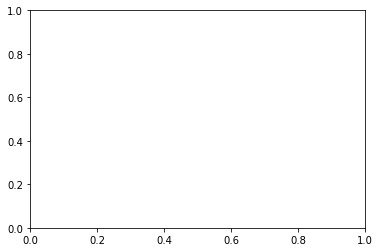

In [133]:
import numpy as np
import matplotlib.pyplot as plt

#create data
quarter = [above_four['Name']]
product_A = [above_four['ratings']]
product_B = [above_four['deliv']]

#define chart parameters
N = 4 
barWidth = .5
xloc = np.arange(N)

#display stacked bar chart
p1 = plt.bar(xloc, product_A, width=barWidth)
p2 = plt.bar(xloc, product_B, bottom=product_A, width=barWidth)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

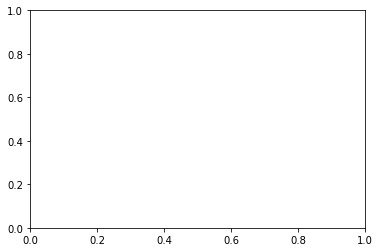

In [132]:
import matplotlib.pyplot as plt
A = [above_four['ratings']]
B = [above_four['deliv']]
Pos = range(4)
plt.bar(Pos, A)
plt.bar(Pos, B, bottom = A)
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

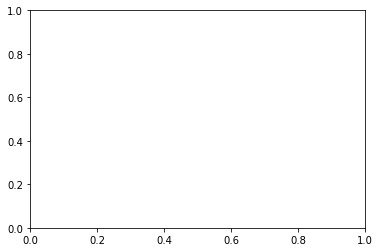

In [129]:
import matplotlib.pyplot as plt


labels = [above_four['Name']]
ratings = [above_four['ratings']]
delivery_rev = [above_four['deliv']]
#men_std = [2, 3, 4, 1, 2]
#women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, ratings, width, label='Ratings')
ax.bar(labels, delivery_rev, width, bottom=ratings,
       label='Delivery_reviews')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [136]:
above_four['ratings']

0      4.1
1      4.1
2      4.3
3      4.2
4      4.3
      ... 
190    4.2
191    4.1
192    4.2
193    4.1
194    4.5
Name: ratings, Length: 195, dtype: float64

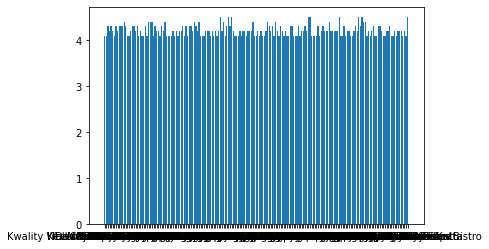

In [139]:
data = above_four['ratings']
plt.bar(above_four['Name'], data)
plt.show()

In [138]:
plt.figure(figsize=(10,7))
rating = above_four['delivery_reviews'].value_count()

sns.barplot(x = rating.index, y = rating)
plt.xlabel("Ratings")
plt.ylabel("no")

AttributeError: 'Series' object has no attribute 'value_count'

<Figure size 720x504 with 0 Axes>

In [ ]:
baner_ratings

In [ ]:
baner_ratings.plot(x="Name", y="ratings", kind="kde")

In [ ]:
plt.figure(figsize = (1000,10))
baner_ratings.plot(x="Name", y="ratings")
plt.show()

## HANDLING BAVDHAN DATA SET

In [ ]:
bavdhan_copy.info()

## HANDLING HINJEWADI DATA SET

In [ ]:
hinjewadi_copy.info()

## HANDLING WAKAD DATA SET

In [ ]:
wakad_copy.info()

In [ ]:
df = pd.concat([baner_copy, bavdhan_copy, hinjewadi_copy, wakad_copy])

In [ ]:
df

In [ ]:
df.info()

## Ratings null and Not null count

### BANER

In [ ]:
print('Null values in Baner data set:', baner_copy['ratings'].isna().sum())

In [ ]:
baner_copy['ratings'].notnull().sum()

### BAVDHAN

In [ ]:
bavdhan_copy['ratings'].isna().sum()

In [ ]:
bavdhan_copy['ratings'].notnull().sum()

### HINJEWADI

In [ ]:
hinjewadi_copy['ratings'].isna().sum()

In [ ]:
hinjewadi_copy['ratings'].notnull().sum()

### WAKAD

In [ ]:
wakad_copy['ratings'].isna().sum()

In [ ]:
wakad_copy['ratings'].notnull().sum()

In [ ]:
baner_ratings.isna().sum()

In [ ]:
baner_copy.isnull().sum()